I want to generate the three plots for two-step, linear, and inverse-linear

In [4]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915


In [6]:


theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMtwo","TLMlinnew","TLMilinnew"]:
    for alpha in [1,0.9,0.8]:
        for R1 in R2*np.linspace(1.1,10,50):
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:    
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]


[ 1.1         1.28163265  1.46326531  1.64489796  1.82653061  2.00816327
  2.18979592  2.37142857  2.55306122  2.73469388  2.91632653  3.09795918
  3.27959184  3.46122449  3.64285714  3.8244898   4.00612245  4.1877551
  4.36938776  4.55102041  4.73265306  4.91428571  5.09591837  5.27755102
  5.45918367  5.64081633  5.82244898  6.00408163  6.18571429  6.36734694
  6.54897959  6.73061224  6.9122449   7.09387755  7.2755102   7.45714286
  7.63877551  7.82040816  8.00204082  8.18367347  8.36530612  8.54693878
  8.72857143  8.91020408  9.09183673  9.27346939  9.45510204  9.63673469
  9.81836735 10.        ]
0.34836280829513555


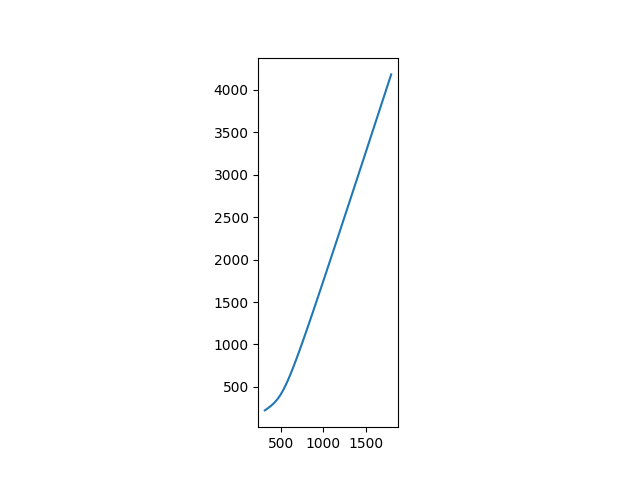

In [79]:
print(np.linspace(1.1,10,50))

freq_list=np.logspace(-1,1,50)
mp.dps=700

cmodel=CustomCircuit(initial_guess=[0.99*R2,0.99*R2*Q,R2*Q,alpha],circuit="TLMlinnew")
z_model=cmodel.predict(frequencies=freq_list)
dip_angle=alpha*45-np.min(-np.angle(z_model,deg=True))
print(dip_angle)

fig, ax= plt.subplots()
ax.plot(np.real(z_model),-np.imag(z_model))
ax.set_aspect("equal")

In [86]:
print(np.linspace(1.1,10,50))

freq_list=np.logspace(-3,3,50)
mp.dps=400

cmodel=CustomCircuit(initial_guess=[1.1*R2,1.1*R2*Q,R2*Q,alpha],circuit="TLMilinnew")
z_model=cmodel.predict(frequencies=freq_list)
dip_angle=alpha*45-np.min(-np.angle(z_model,deg=True))
print(dip_angle)

fig, ax= plt.subplots()
ax.plot(np.real(z_model),-np.imag(z_model))
ax.set_aspect("equal")

[ 1.1         1.28163265  1.46326531  1.64489796  1.82653061  2.00816327
  2.18979592  2.37142857  2.55306122  2.73469388  2.91632653  3.09795918
  3.27959184  3.46122449  3.64285714  3.8244898   4.00612245  4.1877551
  4.36938776  4.55102041  4.73265306  4.91428571  5.09591837  5.27755102
  5.45918367  5.64081633  5.82244898  6.00408163  6.18571429  6.36734694
  6.54897959  6.73061224  6.9122449   7.09387755  7.2755102   7.45714286
  7.63877551  7.82040816  8.00204082  8.18367347  8.36530612  8.54693878
  8.72857143  8.91020408  9.09183673  9.27346939  9.45510204  9.63673469
  9.81836735 10.        ]


In [17]:
# import json
# theta_list = theta_dip_list0
# file_path = "theta_list.json"
# json_data = json.dumps(theta_list)

# with open(file_path, "w") as file:
#     file.write(json_data)

In [5]:
import json
file_path = "theta_list.json"

with open(file_path, "r") as file:
    json_data = file.read()

theta_list=json.loads(json_data)

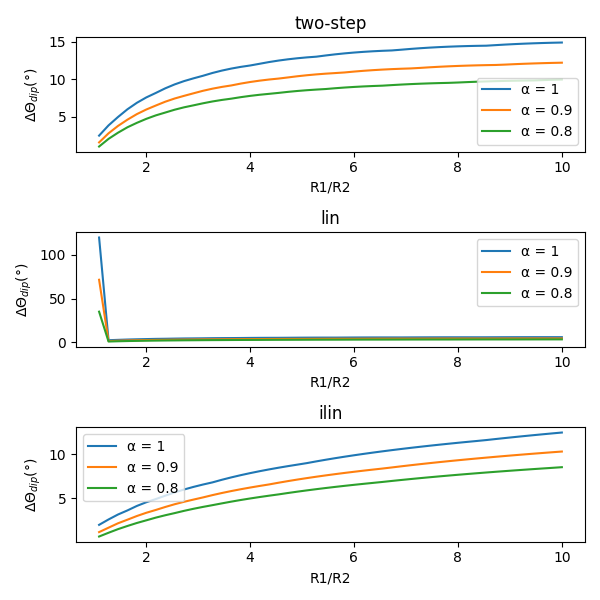

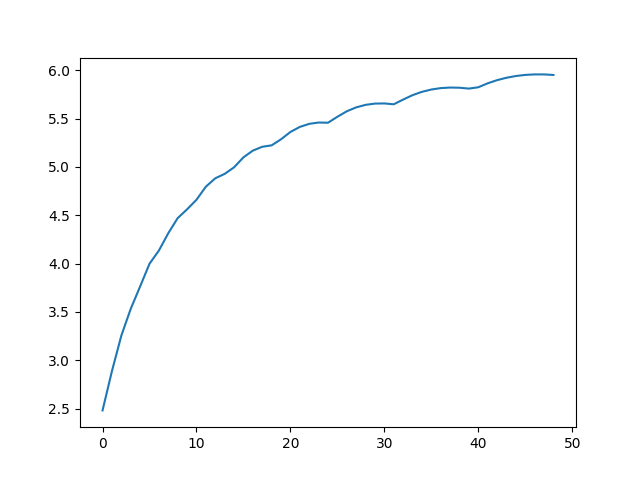

In [67]:
theta_dip_list0=theta_list
fig, [ax_two, ax_lin, ax_ilin]=plt.subplots(3,1)
fig.set_size_inches(6,6)
ax_list= [ax_two, ax_lin, ax_ilin]

for ax,theta,lbl in zip(ax_list,theta_dip_list0,["two-step","lin","ilin"]):
    ax.set_title(lbl)
    ax.set_xlabel("R1/R2")
    ax.set_ylabel("$\Delta \Theta_{dip} (\degree)$")
    for theta2,alpha in zip(theta,[1,0.9,0.8]):
        ax.plot(np.linspace(1.1,10,50),theta2,label=f"α = {alpha}")        
        # ax.grid(True)
        ax.legend()

plt.tight_layout()

gg=theta_dip_list0[1]
hh=gg[0]
fig,axx=plt.subplots()
axx.plot(hh[1:len(hh)])